In [125]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
import statsmodels.api as sm
sb.set()

#### Data Description

In [102]:
df = pd.read_csv('data/homes.csv')
df.head(5)

,Sell,"""List""","""Living""","""Rooms""","""Beds""","""Baths""","""Age""","""Acres""","""Taxes"""
0,142,160,28,10,5,3,60,0.28,3167
1,175,180,18,8,4,1,12,0.43,4033
2,129,132,13,6,3,1,41,0.33,1471
3,138,140,17,7,3,1,22,0.46,3204
4,232,240,25,8,4,3,5,2.05,3613


In [260]:
print(df.describe())

             Sell      "List"   "Living"    "Rooms"     "Beds"    "Baths"  \
count   50.000000   50.000000  50.000000  50.000000  50.000000  50.000000   
mean   170.360000  178.340000  21.120000   8.060000   3.820000   1.860000   
std     72.755885   79.382723   8.351072   1.284285   0.690755   0.756199   
min     87.000000   90.000000  10.000000   5.000000   3.000000   1.000000   
25%    135.000000  140.000000  17.000000   7.000000   3.000000   1.000000   
50%    152.000000  160.000000  20.000000   8.000000   4.000000   2.000000   
75%    182.250000  190.000000  22.750000   9.000000   4.000000   2.000000   
max    567.000000  625.000000  64.000000  12.000000   6.000000   4.000000   

            "Age"    "Acres"       "Taxes"  
count   50.000000  50.000000     50.000000  
mean    30.220000   1.020600   3706.100000  
std     30.962314   1.191496   1579.915268  
min      2.000000   0.220000   1445.000000  
25%     12.250000   0.382500   3107.000000  
50%     24.500000   0.550000   3490.

##### 
The above table provides descriptive statistics for homes in the dataset. This provides a snapshot of each variable, with the mean, standard deviation, quartiles, and minimum and maximum values. 

Focusing on the selling price, we can see that the average selling price for homes in this dataset was \\$170,360 with a standard deviation of \\$72,756. The home sold at the highest price was sold for \\$576,000 and the home sold at the lowest price was sold at \\$87,000. The median home price in the dataset was \\$152,000.

#### Exploratory Data Analysis:

##### Distribution Plots:
The first thing I want to look at in my dataset is the spread of the selling price (SELL). I used a density plot to visualize the distribution of selling prices for homes. An initial pass showed an outlier around \\$550k, so I trimmed the dataset to remove any homes with a selling price greater than \\$400k. This removes the outlier while retaining the bulk of the data.

I ran a density plot and a histogram on the trimmed data. From these graphs I can see that the data isn't normally distributed, but is skewed to the right, as evidenced by the tailing. This means that there are a few properties that sold for relatively higher prices than the rest of the dataset. These homes will shift the average selling price, resulting in an average selling price greater than the median selling price. 

<Axes: xlabel='Sell', ylabel='Density'>

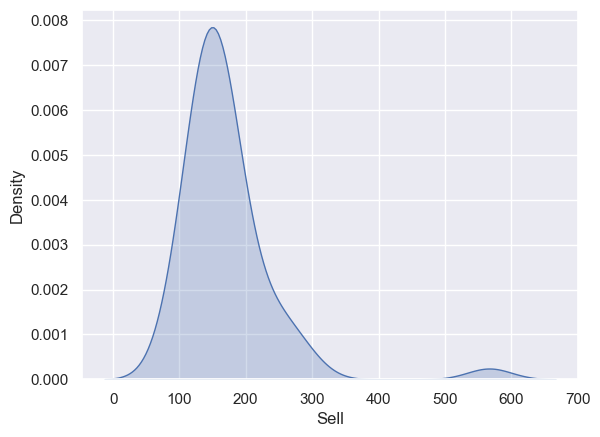

In [246]:
sb.kdeplot(df.Sell, fill=True)

Text(0.5, 1.0, 'Histogram')

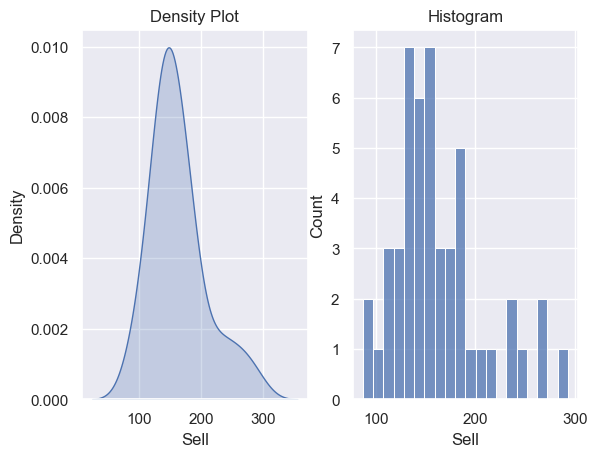

In [248]:
fig, axes = plt.subplots(1,2)

sb.kdeplot(trim_df.Sell, fill=True, ax=axes[0])
axes[0].set_title("Density Plot")

sb.histplot(trim_df.Sell, bins=20, ax=axes[1])
axes[1].set_title("Histogram")

##### Boxplots:
I decided to use boxplots to visualize the spread of homes by Rooms, Bedrooms, and Bathrooms as they give a quick and easy to read visualization. I chose Rooms, Bedrooms, and Bathrooms as these give a general idea of how the home is outfitted. 

All houses have between 1-3 bathes, with a median of 2; between 3 - 5 bedrooms with a median of 4 (excluding the outlier); and 5 - 12 rooms, with a median of 8.

Given that the selling prices averaged $162k for houses with a median of 4 beds, 2 baths tells me that this data is either old or from a significantly lower housing market than Boston in 2025.

<Axes: >

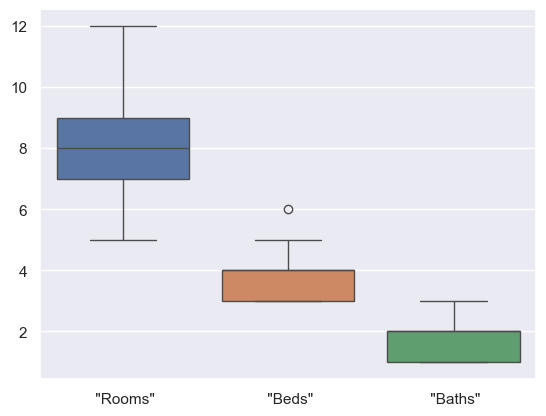

In [167]:
sb.boxplot(trim_df[[' "Rooms"', ' "Beds"', ' "Baths"']])

##### Correlations:
I created a correlation matrix to visualize the relationship of each variable to one another. I'm primarily using the information for correlations between the selling prices and other variables, which is shown in a table.

The reason I'm using a correlation matrix is to see both the strength and direction of correlations between Selling Price and other variables. It's no surprise that the listed price is very strongly positively correlated with the Selling Price, since they both represent the value of the home (only difference being that the selling price is the compromised value between both buyer and seller, while the listed price is solely the initial value the seller placed on their home).

All variables are positively correlated with selling price except for the age of the house, which is weakly negatively correlated. The three variables with the stongest positive correlation to selling price are: Taxes, Living, and Baths, respectively (not including List price).

Sell         1.000000
 "List"      0.995328
 "Taxes"     0.742372
 "Living"    0.715107
 "Baths"     0.565718
 "Rooms"     0.515796
 "Beds"      0.495282
 "Acres"     0.299697
 "Age"      -0.083570
Name: Sell, dtype: float64


<Axes: >

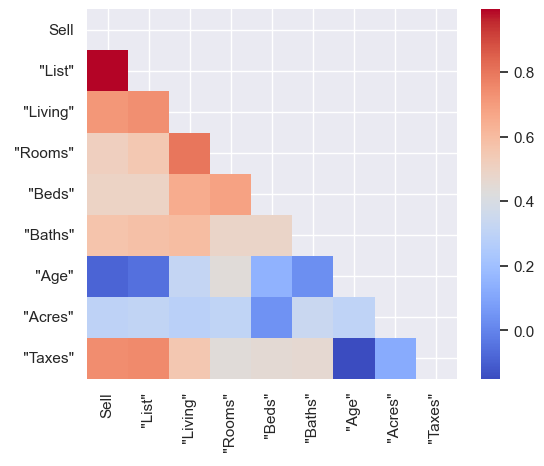

In [204]:
corr = trim_df.corr()
print(corr.Sell.sort_values(ascending = False))

mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sb.color_palette("coolwarm", as_cmap=True)

sb.heatmap(corr, mask=mask, cmap=cmap, square=True)


#### Linear Regression

##### Taxes:

In [270]:
x = trim_df[' "Taxes"']
y = trim_df['Sell']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Sell   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     57.70
Date:                Mon, 03 Mar 2025   Prob (F-statistic):           1.03e-09
Time:                        21:21:13   Log-Likelihood:                -236.34
No. Observations:                  49   AIC:                             476.7
Df Residuals:                      47   BIC:                             480.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         44.2647     16.142      2.742      0.0

Text(0, 0.5, 'Selling Price ($1000)')

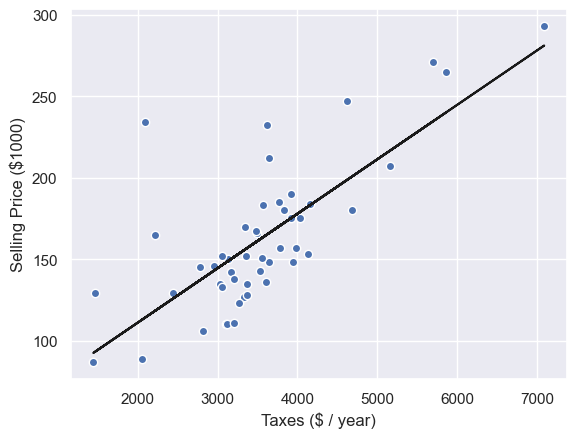

In [225]:
model.predict(x)

plt.scatter(x[' "Taxes"'], y, edgecolor='w')
plt.plot(x[' "Taxes"'], model.predict(x), 'k')
plt.xlabel("Taxes ($ / year)")
plt.ylabel("Selling Price ($1000)")

###### Linear Regression Interpretation:
The linear regression model between Taxes (independent variable) and Selling Price (dependent variable) shows that for every dollar that taxes increase on the property, the selling price of the home increases by \\$33, on average.

The r-squared value is 0.551, meaning that the annual tax cost explains 55.1% of the variability in Selling Prices of homes.

This relationship is statistically significant, with a P-value less than 0.05.

##### Baths:

                            OLS Regression Results                            
Dep. Variable:                   Sell   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     15.28
Date:                Mon, 03 Mar 2025   Prob (F-statistic):           0.000297
Time:                        21:05:05   Log-Likelihood:                -249.06
No. Observations:                  49   AIC:                             502.1
Df Residuals:                      47   BIC:                             505.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.2788     31.977      1.228      0.2

Text(0, 0.5, 'Selling Price ($1000)')

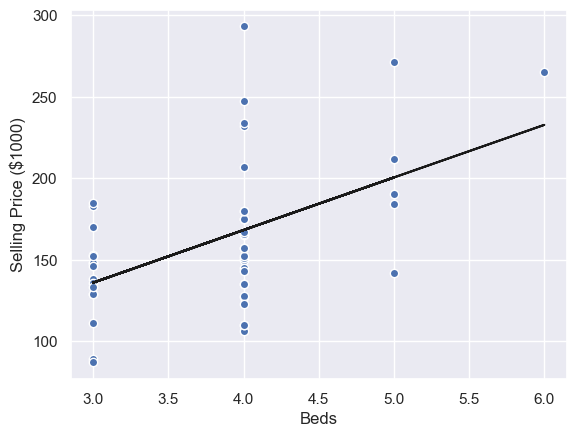

In [243]:
x = trim_df[' "Beds"']
y = trim_df['Sell']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

model.predict(x)

plt.scatter(x[' "Beds"'], y, edgecolor='w')
plt.plot(x[' "Beds"'], model.predict(x), 'k')
plt.xlabel("Beds")
plt.ylabel("Selling Price ($1000)")

###### Linear Regression Interpretation:
The linear regression model between Beds (independent variable) and Selling Price (dependent variable) shows that for additional bathroom, the selling price of the home increases by $32,226, on average.

The r-squared value is 0.245, meaning that the number of bathrooms a home has explains 24.5% of the variability in Selling Prices.

This relationship is statistically significant, with a P-value less than 0.05. The model using bathrooms to predict the selling price of the house is not as good as the model using taxes, as it has a lower correlation coefficient and therefore explains less of the variation in selling price.

These models are limited in that they only account for one variable in predicting the selling price. The price that a home sells for is due to a combination of multiple variables. Multiple linear regression would be a better model, as we could incorporated multiple variables that all play a part to influence the selling price. 